In [10]:
'''
mnist数据分类
作业
浮现上述代码。
计算模型参数。
使用不同大小的批次进行实验，观察模型收敛速度与收敛平稳性。
使用不同大小的学习率进行实验，观察模型收敛速度与收敛平稳性。
使用不同的激活函数进行实验，观察模型收敛速度与收敛平性能。
尝试使用不同的参数初始化方法（如使用不同的正态分布、均匀分布、固定值等方法），观察模型收敛速度。
思考如何改进模型以使得模型性能增强。
思考如何给模型添加新的隐藏层并进行实验。
说明：需对上述问题进行代码实现与结论总结
'''
%matplotlib inline
#可视化在notebook中显示

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt  ##使结果可视化

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [11]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
mnist=input_data.read_data_sets('mnist_data',one_hot=True)

Extracting mnist_data\train-images-idx3-ubyte.gz
Extracting mnist_data\train-labels-idx1-ubyte.gz
Extracting mnist_data\t10k-images-idx3-ubyte.gz
Extracting mnist_data\t10k-labels-idx1-ubyte.gz


In [12]:
mnist.train.images.shape

(55000, 784)

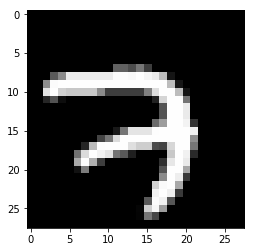

In [13]:
# 可视化训练集中的图片
plt.imshow(Image.fromarray(mnist.train.images[0].reshape(28, 28)))
plt.imshow(Image.fromarray((mnist.train.images[0]*255).astype(np.uint8).reshape([28,28])))


In [14]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [16]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))



In [17]:
with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 15.6668, acc 0.0863
step   500, loss 11.0877, acc 0.2192
step  1000, loss 10.0746, acc 0.3140
step  1500, loss 12.0595, acc 0.3517
step  2000, loss 8.5627, acc 0.3887
step  2500, loss 10.0747, acc 0.4077
step  3000, loss 8.0596, acc 0.4143
step  3500, loss 9.2755, acc 0.4217
step  4000, loss 11.4240, acc 0.4247
step  4500, loss 10.5775, acc 0.4295
step  5000, loss 9.5701, acc 0.4345
step  5500, loss 7.6242, acc 0.4333
step  6000, loss 8.0590, acc 0.4370
step  6500, loss 7.5554, acc 0.4377
step  7000, loss 9.4224, acc 0.4396
step  7500, loss 6.7152, acc 0.4419
step  8000, loss 8.0590, acc 0.4426
step  8500, loss 9.5675, acc 0.4445
step  9000, loss 9.0664, acc 0.4439
step  9500, loss 8.0590, acc 0.4457
step 10000, loss 7.5559, acc 0.4485
step 10500, loss 7.0517, acc 0.4461
step 11000, loss 8.0590, acc 0.4476
step 11500, loss 7.5554, acc 0.4461
step 12000, loss 8.0591, acc 0.4478
step 12500, loss 8.0599, acc 0.4488
step 13000, loss 8.0602, acc 0.4528
step 13500, loss 4.54

In [18]:
#欠完备自编码器
%matplotlib inline
#可视化在notebook中显示

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt  ##使结果可视化

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [19]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
#图片做了归一化处理
mnist=input_data.read_data_sets('mnist_data',one_hot=True)

Extracting mnist_data\train-images-idx3-ubyte.gz
Extracting mnist_data\train-labels-idx1-ubyte.gz
Extracting mnist_data\t10k-images-idx3-ubyte.gz
Extracting mnist_data\t10k-labels-idx1-ubyte.gz


0.23212238


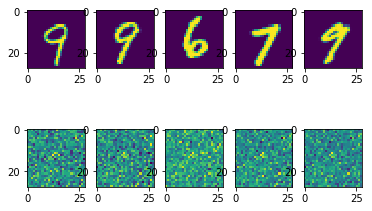

0.2280652


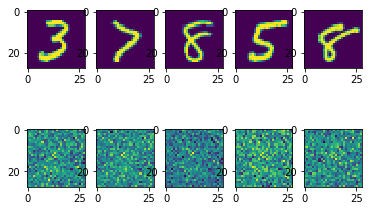

0.21897732


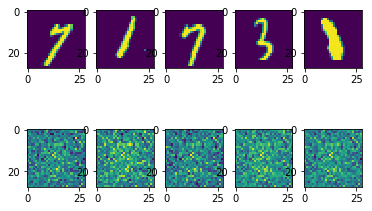

In [20]:
#创建神经网络模型
with tf.Graph().as_default()as g:
    inp_out=tf.placeholder(shape=[None,784],dtype=tf.float32)
    h=tf.keras.layers.Dense(32,activation=tf.nn.relu)(inp_out)#隐藏层数量
    out=tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h)#输出层 activation=tf.nn.sigmoid是激活函数 使原实数范围内的数据收敛为（0--1）
    loss=tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out,out))#先求差再求平方
    saver=tf.train.Saver# 属于分割符 只是保存以上的代码模型
    
with tf.Session(graph=g) as sess:
    optim=tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op=optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    for i in range(5000):
        bacth_img,_=mnist.train.next_batch(32)
        res_loss,_=sess.run([loss,train_op],feed_dict={inp_out:bacth_img})
        
        if i %2000==0:
            print(res_loss)
            bacth_img,_=mnist.test.next_batch(5)
            res_out=sess.run(out,feed_dict={inp_out:bacth_img})
            
            for j in range(10):
                plt.subplot(2,5,j+1)#定义一个画布
                img=bacth_img[j] if j<5 else res_out[j-5]
                img=(img*255).astype(np.uint8).reshape([28,28])
                plt.imshow(img)
            plt.show()

In [21]:
#3.20 稀疏自编码器
%matplotlib inline
#可视化在notebook中显示

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt  ##使结果可视化

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
def kl_divergence(p,p_hat,eps=1e-7):
    p_0=tf.clip_by_value(p,eps,1)
    p_1=tf.clip_by_value(1-p,eps,1)
    p_hat_0=tf.clip_by_value(p_hat,eps,1)
    p_hat_1=tf.clip_by_value(1 - p_hat,eps,1)
    
    res=p_0 * (tf.log(p_0) - tf.log(p_hat_0))+p_1 * (tf.log(p_hat_1))
    res=tf.reduce_mean(res)
    return res  

In [24]:
#1.使用不同大小的批次进行实验，观察模型收敛速度与收敛平稳性。
#batch_size为64、128
#结论：当batch_size从32变为64，则收敛速度加快，并且最终正确率提高；64改为128正确率降低一些。
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(128)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 128):
                batch_images, batch_labels = mnist.test.next_batch(128)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.5381, acc 0.0857
step   500, loss 11.9273, acc 0.2600
step  1000, loss 9.0020, acc 0.3770
step  1500, loss 9.7967, acc 0.4173
step  2000, loss 8.2689, acc 0.4640
step  2500, loss 7.1334, acc 0.5086
step  3000, loss 6.4750, acc 0.5494
step  3500, loss 6.6634, acc 0.5744
step  4000, loss 8.0755, acc 0.5851
step  4500, loss 6.6596, acc 0.5959
step  5000, loss 6.1129, acc 0.6002
step  5500, loss 7.2245, acc 0.6028
step  6000, loss 5.3751, acc 0.6078
step  6500, loss 7.4312, acc 0.6072
step  7000, loss 6.3738, acc 0.6085
step  7500, loss 5.7662, acc 0.6176
step  8000, loss 5.1323, acc 0.6161
step  8500, loss 5.7714, acc 0.6165
step  9000, loss 5.3439, acc 0.6194
step  9500, loss 5.9185, acc 0.6193
step 10000, loss 5.5130, acc 0.6197
step 10500, loss 5.9264, acc 0.6267
step 11000, loss 4.7191, acc 0.6439
step 11500, loss 5.2701, acc 0.6566
step 12000, loss 4.2136, acc 0.6747
step 12500, loss 5.5312, acc 0.6844
step 13000, loss 4.7496, acc 0.6943
step 13500, loss 5.2441, a

In [25]:
#2.使用不同大小的学习率进行实验，观察模型收敛速度与收敛平稳性。
#学习率为0.01、0.05、0.1、
#结论：学习率为0.1的收敛速度明显比较快，但收敛平稳性较差
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.2701, acc 0.0865
step   500, loss 7.1735, acc 0.3247
step  1000, loss 10.5775, acc 0.4289
step  1500, loss 7.5514, acc 0.4692
step  2000, loss 6.5461, acc 0.5106
step  2500, loss 7.0680, acc 0.5270
step  3000, loss 7.5531, acc 0.5548
step  3500, loss 3.2365, acc 0.5653
step  4000, loss 8.0595, acc 0.5761
step  4500, loss 7.8070, acc 0.5848
step  5000, loss 5.6884, acc 0.5865
step  5500, loss 6.5550, acc 0.5941
step  6000, loss 7.5990, acc 0.5918
step  6500, loss 6.0533, acc 0.6048
step  7000, loss 6.0444, acc 0.6029
step  7500, loss 3.5260, acc 0.6103
step  8000, loss 6.0460, acc 0.6086
step  8500, loss 6.2704, acc 0.6147
step  9000, loss 4.0295, acc 0.6109
step  9500, loss 7.0411, acc 0.6127
step 10000, loss 7.0517, acc 0.6170
step 10500, loss 7.0517, acc 0.6174
step 11000, loss 5.7712, acc 0.6164
step 11500, loss 6.5985, acc 0.6196
step 12000, loss 4.5332, acc 0.6208
step 12500, loss 8.0590, acc 0.6200
step 13000, loss 6.2819, acc 0.6222
step 13500, loss 5.5407, a

In [ ]:
#3.使用不同的激活函数进行实验，观察模型收敛速度与收敛平性能。
#使用relu和tanh激活函数， tanh函数的正确率较高、收敛速度较快，两者收敛平稳性差不多

with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    #激活函数为relu
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    #激活函数为tf.nn.tanh
    # hidden_output = tf.nn.tanh(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

In [ ]:
#4.不同的初始化方式

with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.tanh(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数 两种初始化方式 
    #使用tf.random_uniform比tf.random_normal的正确率高，且收敛效果更平稳
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    #output_weight = tf.Variable(tf.random_uniform([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))